This notebook contains extensive code related to data cleaning and feature engineering, which has made it somewhat difficult to manage. While the final dataset (final_main_data_cleaned.csv) used for training is derived from the processes implemented here, the code may not follow a specific or structured order due to time constraints during its development.

To run the main pipeline, ensure that the final dataset (final_main_data_cleaned.csv) is placed in the data/raw folder. Once the data is correctly positioned, you can execute the complete pipeline by running main.py.

The link for the data is: https://drive.google.com/drive/folders/1FBnIobbHM4hJ0ANcg02-J8lUczXEm2zP

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re
from bs4 import BeautifulSoup
from datetime import datetime
import logging
from ast import literal_eval



In [6]:
# Define the path to your data directory
data_dir = Path("../data/raw")

In [3]:
main_df = pd.read_csv(data_dir/'usecase_1_.csv')

# Load eligibility dataset
# Assuming it's tab-separated; adjust 'sep' if different
eligibility_df = pd.read_csv(data_dir/'eligibilities.txt', sep='|')


print("Main DataFrame columns:")
print(main_df.columns)

print("\nEligibility DataFrame columns:")
print(eligibility_df.columns)


Main DataFrame columns:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'NCT Number', 'Study Title', 'Study URL',
       'Acronym', 'Study Status', 'Brief Summary', 'Study Results',
       'Conditions', 'Interventions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents'],
      dtype='object')

Eligibility DataFrame columns:
Index(['id', 'nct_id', 'sampling_method', 'gender', 'minimum_age',
       'maximum_age', 'healthy_volunteers', 'population', 'criteria',
       'gender_description', 'gender_based', 'adult', 'child', 'older_adult'],
      dtype='object')


In [4]:
# Rename columns for consistency
main_df.rename(columns={'NCT Number': 'NCT_Number'}, inplace=True)
eligibility_df.rename(columns={'nct_id': 'NCT_Number'}, inplace=True)

# Merge on 'NCT_Number'
merged_df = pd.merge(main_df, eligibility_df, on='NCT_Number', how='left')

# Display merged DataFrame
print(merged_df.head())


   Unnamed: 0.1  Unnamed: 0   NCT_Number  \
0             0           1  NCT03302091   
1             1           2  NCT01948791   
2             2           5  NCT04621591   
3             3           6  NCT03130491   
4             4           8  NCT01580891   

                                         Study Title  \
0  A Study in People With Normal Kidney Function ...   
1  16w Interventional Study on Titration and Dose...   
2           Case Series With Saneso 360° Gastroscope   
3  European Study Evaluating the EMBLOK Embolic P...   
4  Evaluate the Clinical Equivalence of Two Nafti...   

                                      Study URL   Acronym Study Status  \
0  https://clinicaltrials.gov/study/NCT03302091       NaN    COMPLETED   
1  https://clinicaltrials.gov/study/NCT01948791  INSTINCT    COMPLETED   
2  https://clinicaltrials.gov/study/NCT04621591       NaN    COMPLETED   
3  https://clinicaltrials.gov/study/NCT03130491       NaN    COMPLETED   
4  https://clinicaltrials.go

In [5]:
# Drop the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

print("Columns 'Unnamed: 0.1' and 'Unnamed: 0' have been dropped.")

Columns 'Unnamed: 0.1' and 'Unnamed: 0' have been dropped.


In [6]:
total_rows = len(merged_df)
print(f"Total number of rows: {total_rows}")

# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Total number of rows: 117980
Missing Values per Column:
 NCT_Number                         0
Study Title                        0
Study URL                          0
Acronym                        93864
Study Status                       0
Brief Summary                      0
Study Results                      0
Conditions                        30
Interventions                   5656
Primary Outcome Measures        3077
Secondary Outcome Measures     24780
Other Outcome Measures        110056
Sponsor                            0
Collaborators                  96614
Sex                              142
Age                                0
Phases                         34885
Enrollment                      1833
Funder Type                        0
Study Type                         0
Study Design                     652
Other IDs                          3
Start Date                      1739
Primary Completion Date         5994
Completion Date                 5326
First Posted      

In [7]:
import pandas as pd

df = pd.read_csv(data_dir/"eligibilities_usecase_1.csv")

columns_to_remove = [
    "Acronym",
    "Other Outcome Measures",
    "Collaborators",
    "Study Documents",
    "sampling_method",
    "population",
    "gender_description",
    "gender_based",
    "Results First Posted"
]

# Drop the columns
cleaned_data = df.drop(columns=columns_to_remove, errors="ignore")

# Save the cleaned dataframe to a new CSV
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Columns removed and dataset saved to 'cleaned_dataset.csv'")

Columns removed and dataset saved to 'cleaned_dataset.csv'


Distribution of 'Phases' column:
Phases
PHASE1           26771
PHASE3           21161
PHASE2           20501
PHASE4            6930
PHASE1|PHASE2     5617
PHASE2|PHASE3     1600
EARLY_PHASE1       515
Name: count, dtype: int64


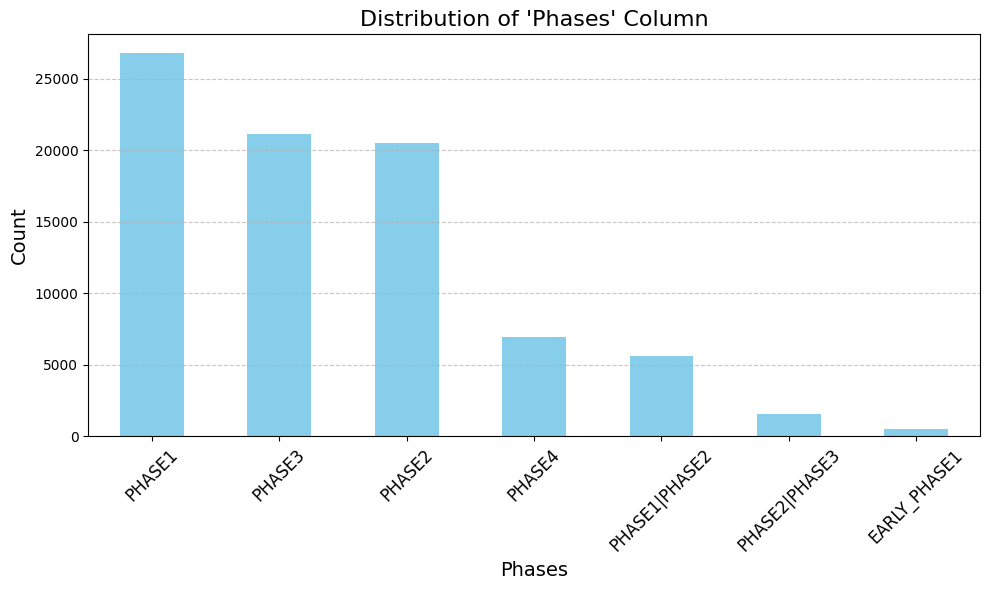

In [8]:
#Distribution of Phases

# Get the distribution of the 'Phases' column
phases_distribution = cleaned_data['Phases'].value_counts()

# Print the distribution
print("Distribution of 'Phases' column:")
print(phases_distribution)

# Visualize the distribution with a bar chart
plt.figure(figsize=(10, 6))
phases_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of 'Phases' Column", fontsize=16)
plt.xlabel("Phases", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# The count of unique values in the 'Study Type' column, including NaN
study_type_counts = cleaned_data['Study Type'].value_counts(dropna=False)

# Print the counts
print("Counts of each unique value in the 'Study Type' column:")
print(study_type_counts)


Counts of each unique value in the 'Study Type' column:
Study Type
INTERVENTIONAL     101198
OBSERVATIONAL       16130
EXPANDED_ACCESS       652
Name: count, dtype: int64


In [10]:
# Filter for rows where 'Study Type' is 'OBSERVATIONAL' and 'Phases' is null
observational_null_phases = cleaned_data[(cleaned_data['Study Type'] == 'OBSERVATIONAL') & (cleaned_data['Phases'].isna())]

# Get the count of such rows
null_phases_count = observational_null_phases.shape[0]

# Print the result
print(f"Number of rows where 'Study Type' is 'OBSERVATIONAL' and 'Phases' is null: {null_phases_count}")

Number of rows where 'Study Type' is 'OBSERVATIONAL' and 'Phases' is null: 16130


In [11]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Replace NaN values in 'Phases' where 'Study Type' is 'OBSERVATIONAL' with 'Not_Applicable'
cleaned_data.loc[(cleaned_data['Study Type'] == 'OBSERVATIONAL') & (cleaned_data['Phases'].isna()), 'Phases'] = 'NOT_APPLICABLE'

# Save the updated dataset to the same CSV file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Updated 'Phases' column for OBSERVATIONAL study type where it was null and saved to 'cleaned_dataset.csv'.")

Updated 'Phases' column for OBSERVATIONAL study type where it was null and saved to 'cleaned_dataset.csv'.


In [12]:
# Fill all null values in 'Phases' with 'Unknown'
cleaned_data['Phases'].fillna('UNKNOWN', inplace=True)

# Save the updated dataset back to the same CSV file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("All null values in 'Phases' have been replaced with 'Unknown' and saved to 'cleaned_dataset.csv'.")

All null values in 'Phases' have been replaced with 'Unknown' and saved to 'cleaned_dataset.csv'.


In [13]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Set 'Phases' to 'NOT_APPLICABLE' where 'Study Type' is 'Expanded Access'
cleaned_data.loc[cleaned_data['Study Type'] == 'EXPANDED_ACCESS', 'Phases'] = 'NOT_APPLICABLE'

# Save the updated dataset back to the same CSV file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Set 'Phases' to 'NOT_APPLICABLE' where 'Study Type' is 'Expanded Access' and saved to 'cleaned_dataset.csv'.")

Set 'Phases' to 'NOT_APPLICABLE' where 'Study Type' is 'Expanded Access' and saved to 'cleaned_dataset.csv'.


In [14]:
# Handle missing values in the 'Interventions' column based on 'Study Type'
cleaned_data['Interventions'] = cleaned_data.apply(
    lambda row: "No Interventions (OBSERVATIONAL)" if pd.isna(row['Interventions']) and row['Study Type'] == "OBSERVATIONAL" else
                "NOT_APPLICABLE" if pd.isna(row['Interventions']) and row['Study Type'] == "OBSERVATIONAL" else
                "UNKNOWN_INTERVENTION" if pd.isna(row['Interventions']) and row['Study Type'] in ["INTERVENTIONAL", "EXPANDED_ACCESS"] else
                "NOT_REPORTED" if pd.isna(row['Interventions']) and row['Study Type'] in ["INTERVENTIONAL", "EXPANDED_ACCESS"] else
                row['Interventions'], axis=1)

# Save the updated dataset back to the same CSV file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Missing values in 'Interventions' column imputed based on 'Study Type' and saved to 'cleaned_dataset.csv'.")

Missing values in 'Interventions' column imputed based on 'Study Type' and saved to 'cleaned_dataset.csv'.


In [15]:
import pandas as pd

# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# 1. Check if missing trials are mostly observational
observational_missing = cleaned_data[(cleaned_data['Primary Outcome Measures'].isna()) & (cleaned_data['Study Type'] == 'Observational')]
total_missing = cleaned_data['Primary Outcome Measures'].isna().sum()
observational_missing_count = observational_missing.shape[0]
observational_percentage = (observational_missing_count / total_missing) * 100

print(f"Total missing Primary Outcomes: {total_missing}")
print(f"Missing Primary Outcomes in Observational Studies: {observational_missing_count} ({observational_percentage:.2f}%)")

# 2. Check if missing trials are mostly older registrations
cleaned_data['Registration Year'] = pd.to_datetime(cleaned_data['Start Date'], errors='coerce').dt.year
older_registrations = cleaned_data[(cleaned_data['Primary Outcome Measures'].isna()) & (cleaned_data['Registration Year'] <= 2010)]
older_registration_count = older_registrations.shape[0]
older_percentage = (older_registration_count / total_missing) * 100

print(f"Missing Primary Outcomes from older registrations (<=2010): {older_registration_count} ({older_percentage:.2f}%)")

# 3. Check for patterns by sponsor or location
missing_by_sponsor = cleaned_data[cleaned_data['Primary Outcome Measures'].isna()].groupby('Sponsor').size().sort_values(ascending=False)
missing_by_location = cleaned_data[cleaned_data['Primary Outcome Measures'].isna()].groupby('Locations').size().sort_values(ascending=False)

print("\nTop Sponsors with Missing Primary Outcomes:")
print(missing_by_sponsor.head())

print("\nTop Locations with Missing Primary Outcomes:")
print(missing_by_location.head())


Total missing Primary Outcomes: 3077
Missing Primary Outcomes in Observational Studies: 0 (0.00%)
Missing Primary Outcomes from older registrations (<=2010): 44 (1.43%)

Top Sponsors with Missing Primary Outcomes:
Sponsor
Pfizer                                              103
Merck Sharp & Dohme LLC                              89
Wyeth is now a wholly owned subsidiary of Pfizer     80
Bristol-Myers Squibb                                 78
AstraZeneca                                          75
dtype: int64

Top Locations with Missing Primary Outcomes:
Locations
Glaxo Wellcome Inc, Research Triangle Park, North Carolina, 27709, United States             10
Celgene, Summit, New Jersey, 07901, United States                                             7
Newport Pharmaceuticals International Inc, Laguna Hills, California, 92656, United States     6
Allergopharma GmbH & Co. KG, Reinbek, 21465, Germany                                          6
Memorial Sloan-Kettering Cancer Center, New Y

In [16]:
cleaned_data['Primary Outcome Measures'].fillna('UNKNOWN_PRIMARY_OUTCOME', inplace=True)
cleaned_data.to_csv("cleaned_dataset.csv", index=False)
print("All missing 'Primary Outcome' values have been labeled as 'UNKNOWN_PRIMARY_OUTCOME'.")

All missing 'Primary Outcome' values have been labeled as 'UNKNOWN_PRIMARY_OUTCOME'.


In [17]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Total missing count in 'Secondary Outcome Measures'
missing_secondary_outcomes = cleaned_data['Secondary Outcome Measures'].isna().sum()
total_rows = cleaned_data.shape[0]

print(f"Total rows in the dataset: {total_rows}")
print(f"Total missing 'Secondary Outcome Measures': {missing_secondary_outcomes} ({(missing_secondary_outcomes / total_rows) * 100:.2f}%)")

# Check for explicit "no secondary outcomes" in 'Brief Summary' or 'Study Title'
explicit_no_secondary = cleaned_data[
    (cleaned_data['Secondary Outcome Measures'].isna()) & 
    (cleaned_data['Brief Summary'].str.contains("no secondary outcomes", case=False, na=False) | 
     cleaned_data['Study Title'].str.contains("no secondary outcomes", case=False, na=False))
]

explicit_no_secondary_count = explicit_no_secondary.shape[0]
print(f"Rows explicitly stating 'no secondary outcomes': {explicit_no_secondary_count}")

# Check for mentions of "Secondary endpoints include" in 'Brief Summary' or 'Study Title'
secondary_mentions = cleaned_data[
    (cleaned_data['Secondary Outcome Measures'].isna()) & 
    (cleaned_data['Brief Summary'].str.contains("secondary", case=False, na=False) | 
     cleaned_data['Study Title'].str.contains("secondary", case=False, na=False))
]

secondary_mentions_count = secondary_mentions.shape[0]
print(f"Rows with mentions of 'secondary': {secondary_mentions_count}")


# Assign "NO_SECONDARY_OUTCOME_SPECIFIED" to rows with no textual evidence of secondary outcomes
cleaned_data['Secondary Outcome Measures'] = cleaned_data.apply(
    lambda row: "NO_SECONDARY_OUTCOME_SPECIFIED" if pd.isna(row['Secondary Outcome Measures']) and not (
        "secondary" in str(row['Brief Summary']).lower() or 
        "secondary" in str(row['Study Title']).lower()
    ) else row['Secondary Outcome Measures'],
    axis=1
)

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Rows with no textual evidence of secondary outcomes have been labeled as 'NO_SECONDARY_OUTCOME_SPECIFIED'.")

Total rows in the dataset: 117980
Total missing 'Secondary Outcome Measures': 24780 (21.00%)
Rows explicitly stating 'no secondary outcomes': 0
Rows with mentions of 'secondary': 598
Rows with no textual evidence of secondary outcomes have been labeled as 'NO_SECONDARY_OUTCOME_SPECIFIED'.


In [18]:
# Replace NaN values in the 'Location' column with 'NOT_REPORTED'
cleaned_data['Locations'].fillna('NOT_REPORTED', inplace=True)

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Replaced NaN values in 'Location' with 'NOT_REPORTED' and saved to 'cleaned_dataset.csv'.")


Replaced NaN values in 'Location' with 'NOT_REPORTED' and saved to 'cleaned_dataset.csv'.


In [19]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Filter rows where 'criteria' is missing
missing_criteria = cleaned_data[cleaned_data['criteria'].isna()]

# Check for missing values in other columns in these rows
missing_columns_summary = missing_criteria.isna().sum()

# Filter only the columns with missing values
missing_columns_with_count = missing_columns_summary[missing_columns_summary > 0]

# Print the results
print("Columns with missing values when 'criteria' is missing:")
print(missing_columns_with_count)


Columns with missing values when 'criteria' is missing:
Conditions                      10
Secondary Outcome Measures       8
Sex                             33
Enrollment                      46
Study Design                    36
Start Date                      43
Primary Completion Date         47
Completion Date                 48
id                            1812
gender                        1844
minimum_age                   1843
maximum_age                   1858
healthy_volunteers            1839
criteria                      1865
adult                         1812
child                         1812
older_adult                   1812
Registration Year              430
dtype: int64


In [20]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_dataset.csv')

# Function to parse Age column and set flags for missing values
def fill_flags(row):
    age_value = str(row['Age']).upper()
    return {
        'adult': row['adult'] if pd.notna(row['adult']) else ('t' if 'ADULT' in age_value else 'f'),
        'child': row['child'] if pd.notna(row['child']) else ('t' if 'CHILD' in age_value else 'f'),
        'older_adult': row['older_adult'] if pd.notna(row['older_adult']) else ('t' if 'OLDER_ADULT' in age_value else 'f')
    }

# Apply the function to update only missing values
updated_flags = data.apply(fill_flags, axis=1).apply(pd.Series)

# Update the existing columns with the new values
data[['adult', 'child', 'older_adult']] = updated_flags

# Save the updated dataset
data.to_csv('cleaned_dataset.csv', index=False)

print("Missing values in 'adult', 'child', and 'older_adult' columns have been filled and saved to 'cleaned_dataset.csv'.")


Missing values in 'adult', 'child', and 'older_adult' columns have been filled and saved to 'cleaned_dataset.csv'.


In [21]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Define a function to map logical flags to numeric ranges only for missing values
def map_age_ranges(row):
    # Preserve existing values
    min_age = row['minimum_age']
    max_age = row['maximum_age']
    
    # Fill missing values based on flags
    if pd.isna(min_age) or pd.isna(max_age):
        if row['child'] == 't' and row['adult'] == 'f' and row['older_adult'] == 'f':
            return min_age if pd.notna(min_age) else "0 Years", max_age if pd.notna(max_age) else "17 Years"  # Pediatric-only trial
        elif row['child'] == 'f' and row['adult'] == 't' and row['older_adult'] == 'f':
            return min_age if pd.notna(min_age) else "18 Years", max_age if pd.notna(max_age) else "64 Years"  # Adult-only trial
        elif row['child'] == 'f' and row['adult'] == 't' and row['older_adult'] == 't':
            return min_age if pd.notna(min_age) else "18 Years", max_age if pd.notna(max_age) else "120 Years"  # Adult + Older Adult trial
        elif row['child'] == 't' and row['adult'] == 't' and row['older_adult'] == 'f':
            return min_age if pd.notna(min_age) else "0 Years", max_age if pd.notna(max_age) else "64 Years"  # Child + Adult up to 64
        elif row['child'] == 't' and row['adult'] == 't' and row['older_adult'] == 't':
            return min_age if pd.notna(min_age) else "0 Years", max_age if pd.notna(max_age) else "120 Years"  # All ages
    return min_age, max_age  # Keep original values if no nulls

# Apply the function to fill missing values for minimum_age and maximum_age
cleaned_data[['minimum_age', 'maximum_age']] = cleaned_data.apply(
    lambda row: pd.Series(map_age_ranges(row)), axis=1
)

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Filled missing minimum_age and maximum_age with appropriate ranges and saved to 'cleaned_dataset.csv'.")

Filled missing minimum_age and maximum_age with appropriate ranges and saved to 'cleaned_dataset.csv'.


In [22]:
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Drop the 'Registration Year' column if it exists
if 'Registration Year' in cleaned_data.columns:
    cleaned_data.drop(columns=['Registration Year'], inplace=True)

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Dropped the 'Registration Year' column and saved the updated dataset.")

Dropped the 'Registration Year' column and saved the updated dataset.


In [23]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Replace null values in the 'Conditions' column with "UNKNOWN CONDITIONS"
cleaned_data['Conditions'].fillna("UNKNOWN CONDITIONS", inplace=True)

# Save the updated dataset back to the same file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Replaced null values in the 'Conditions' column with 'UNKNOWN CONDITIONS' and saved to 'cleaned_dataset.csv'.")


Replaced null values in the 'Conditions' column with 'UNKNOWN CONDITIONS' and saved to 'cleaned_dataset.csv'.


In [24]:
# Function to fill missing 'Sex' values based on 'Gender'
def fill_sex_from_gender(row):
    if pd.isna(row['Sex']) and pd.notna(row['gender']):
        return row['gender']  # Use 'Gender' value to fill 'Sex'
    return row['Sex']  # Keep existing value if not missing

# Apply the function to fill missing 'Sex' values
cleaned_data['Sex'] = cleaned_data.apply(fill_sex_from_gender, axis=1)

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Filled missing 'Sex' values where 'Gender' is present and saved the dataset.")


Filled missing 'Sex' values where 'Gender' is present and saved the dataset.


In [25]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Drop the 'Gender' column
if 'gender' in cleaned_data.columns:
    cleaned_data.drop(columns=['gender'], inplace=True)

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Dropped the 'gender' column and saved the updated dataset.")

Dropped the 'gender' column and saved the updated dataset.


In [26]:
# Replace null values in the 'Sex' column with "UNKNOWN_SEX"
cleaned_data['Sex'].fillna("UNKNOWN_SEX", inplace=True)

# Save the updated dataset back to the same file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Replaced null values in the 'Sex' column with 'UNKNOWN_SEX' and saved to 'cleaned_dataset.csv'.")

Replaced null values in the 'Sex' column with 'UNKNOWN_SEX' and saved to 'cleaned_dataset.csv'.


In [27]:
# Replace null values in the 'Other IDs' column with "UNKNOWN_OTHER_ID"
cleaned_data['Other IDs'].fillna("UNKNOWN_OTHER_ID", inplace=True)

# Save the updated dataset back to the same file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Replaced null values in the 'Other IDs' column with 'UNKNOWN_OTHER_ID' and saved to 'cleaned_dataset.csv'.")


Replaced null values in the 'Other IDs' column with 'UNKNOWN_OTHER_ID' and saved to 'cleaned_dataset.csv'.


In [28]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Replace null values in the 'Secondary Outcome Measures' column with "NO_SECONDARY_OUTCOME_SPECIFIED"
cleaned_data['Secondary Outcome Measures'].fillna("NO_SECONDARY_OUTCOME_SPECIFIED", inplace=True)

# Save the updated dataset back to the same file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Replaced null values in the 'Secondary Outcome Measures' column with 'NO_SECONDARY_OUTCOME_SPECIFIED' and saved to 'cleaned_dataset.csv'.")


Replaced null values in the 'Secondary Outcome Measures' column with 'NO_SECONDARY_OUTCOME_SPECIFIED' and saved to 'cleaned_dataset.csv'.


In [29]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Replace non-standard missing values in the 'Enrollment' column with NaN
missing_values = ["", "NA", "None", "null", "Missing", " "]
cleaned_data['Enrollment'] = cleaned_data['Enrollment'].replace(missing_values, np.nan)

# Save the updated dataset back to the same file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Set missing values in the 'Enrollment' column to NaN and saved to 'cleaned_dataset.csv'.")

missing_values = cleaned_data['Enrollment'].isna().sum()
print(f"Remaining missing values in 'Enrollment': {missing_values}")


# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Replace missing values in the 'Enrollment' column with "NOT_PROVIDED"
cleaned_data['Enrollment'] = cleaned_data['Enrollment'].fillna("NOT_PROVIDED")

# Save the updated dataset back to the same file
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Imputed missing values in the 'Enrollment' column with 'NOT_PROVIDED' and saved to 'cleaned_dataset.csv'.")



Set missing values in the 'Enrollment' column to NaN and saved to 'cleaned_dataset.csv'.
Remaining missing values in 'Enrollment': 1833
Imputed missing values in the 'Enrollment' column with 'NOT_PROVIDED' and saved to 'cleaned_dataset.csv'.


In [30]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Filter rows where 'Study Type' is 'OBSERVATIONAL' and 'Study Design' is the specific value
count = cleaned_data[
    (cleaned_data['Study Type'] == 'OBSERVATIONAL') & 
    (cleaned_data['Study Design'] == 'Observational Model: |Time Perspective: p')
].shape[0]

# Print the count
print(f"Number of rows where 'Study Type' is 'OBSERVATIONAL' and 'Study Design' is 'Observational Model: |Time Perspective: p': {count}")


import pandas as pd

# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Count where 'Study Type' is 'OBSERVATIONAL'
observational_count = cleaned_data[cleaned_data['Study Type'] == 'OBSERVATIONAL'].shape[0]

# Count where 'Study Design' is 'Observational Model: |Time Perspective: p'
specific_study_design_count = cleaned_data[cleaned_data['Study Design'] == 'Observational Model: |Time Perspective: p'].shape[0]

# Print the counts
print(f"Number of rows where 'Study Type' is 'OBSERVATIONAL': {observational_count}")
print(f"Number of rows where 'Study Design' is 'Observational Model: |Time Perspective: p': {specific_study_design_count}")

Number of rows where 'Study Type' is 'OBSERVATIONAL' and 'Study Design' is 'Observational Model: |Time Perspective: p': 16130
Number of rows where 'Study Type' is 'OBSERVATIONAL': 16130
Number of rows where 'Study Design' is 'Observational Model: |Time Perspective: p': 16130


In [31]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Fill null values in 'Study Design' based on conditions
cleaned_data['Study Design'] = cleaned_data.apply(
    lambda row: 'Observational Model: |Time Perspective: p' 
    if pd.isna(row['Study Design']) and row['Study Type'] == 'Observational' else row['Study Design'], axis=1
)

# Fill remaining null values in 'Study Design' with 'UNKNOWN_STUDY_DESIGN'
cleaned_data['Study Design'].fillna('UNKNOWN_STUDY_DESIGN', inplace=True)

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Updated 'Study Design' values saved to 'cleaned_dataset.csv'.")


Updated 'Study Design' values saved to 'cleaned_dataset.csv'.


In [32]:
# Replace null values in the 'criteria' column with 'NOT_REPORTED_CRITERIA'
cleaned_data['criteria'] = cleaned_data['criteria'].fillna('NOT_REPORTED_CRITERIA')

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Filled missing values in 'criteria' column with 'NOT_REPORTED_CRITERIA' and saved the dataset.")

Filled missing values in 'criteria' column with 'NOT_REPORTED_CRITERIA' and saved the dataset.


In [33]:
# Replace null values in 'healthy_volunteers' with 'UNKNOWN_HEALTHY_VOLUNTEERS'
cleaned_data['healthy_volunteers'] = cleaned_data['healthy_volunteers'].fillna('UNKNOWN_HEALTHY_VOLUNTEERS')

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Filled missing values in 'healthy_volunteers' with 'UNKNOWN_HEALTHY_VOLUNTEERS' and saved the dataset.")

Filled missing values in 'healthy_volunteers' with 'UNKNOWN_HEALTHY_VOLUNTEERS' and saved the dataset.


In [34]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("cleaned_dataset.csv")

# Impute missing values only for null entries in specified columns
# Replace missing values in date columns with 'NOT_AVAILABLE'
date_columns = ['Start Date', 'Primary Completion Date', 'Completion Date']
for col in date_columns:
    cleaned_data[col] = cleaned_data[col].fillna('NOT_AVAILABLE')

# Replace missing values in 'id' with 'UNKNOWN_ID'
cleaned_data['id'] = cleaned_data['id'].fillna('UNKNOWN_ID')

# Replace missing values in 'minimum_age' and 'maximum_age' with specific placeholders
cleaned_data['minimum_age'] = cleaned_data['minimum_age'].fillna('NOT_SPECIFIED_MIN_AGE')
cleaned_data['maximum_age'] = cleaned_data['maximum_age'].fillna('NOT_SPECIFIED_MAX_AGE')

# Save the updated dataset
cleaned_data.to_csv("cleaned_dataset.csv", index=False)

print("Handled missing values for 'Start Date', 'Primary Completion Date', 'Completion Date', 'id', 'minimum_age', and 'maximum_age' only where null.")

Handled missing values for 'Start Date', 'Primary Completion Date', 'Completion Date', 'id', 'minimum_age', and 'maximum_age' only where null.


In [35]:
data_path = 'cleaned_dataset.csv'

try:
    df = pd.read_csv(
        data_path, 
        delimiter=',',      # Assuming comma-delimited; change to '\t' if tab-delimited
        encoding='utf-8',   # Change encoding if necessary (e.g., 'latin1')
        quotechar='"',      # Handle fields enclosed in double quotes
        escapechar='\\',    # Handle escape characters if present
        warn_bad_lines=True     # Warn about bad lines (deprecated in newer pandas)
    )
except Exception as e:
    print(f"Error loading CSV: {e}")


print("\n=== Data Types of Each Column ===")
print(df.dtypes)


Error loading CSV: read_csv() got an unexpected keyword argument 'warn_bad_lines'

=== Data Types of Each Column ===
NCT_Number                     object
Study Title                    object
Study URL                      object
Acronym                        object
Study Status                   object
Brief Summary                  object
Study Results                  object
Conditions                     object
Interventions                  object
Primary Outcome Measures       object
Secondary Outcome Measures     object
Other Outcome Measures         object
Sponsor                        object
Collaborators                  object
Sex                            object
Age                            object
Phases                         object
Enrollment                    float64
Funder Type                    object
Study Type                     object
Study Design                   object
Other IDs                      object
Start Date                     object
Primary C

In [36]:
#Convert Boolean Fields from 't'/'f' to True/False
bool_columns = ['healthy_volunteers', 'adult', 'child', 'older_adult']

def convert_bool(val):
    """Convert 't'/'f' strings to True/False."""
    if isinstance(val, str):
        return True if val.lower() == 't' else False
    return val  # Keep as is if not a string

for col in bool_columns:
    if col in df.columns:
        df[col] = df[col].apply(convert_bool)

# Verify the conversion
print("\n=== Unique Values in Boolean Columns After Conversion ===")
for col in bool_columns:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")


=== Unique Values in Boolean Columns After Conversion ===
healthy_volunteers: [True False nan]
adult: [True False nan]
child: [False True nan]
older_adult: [True False nan]


In [37]:
#Convert Categorical Columns to 'category' dtype
categorical_columns = [
    'Study Status',
    'Sex',
    'Phases',
    'Funder Type',
    'Study Type',
    'Study Results'
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Display categories for verification
print("\n=== Categories in Categorical Columns ===")
for col in categorical_columns:
    if col in df.columns:
        print(f"\nCategories in '{col}':")
        print(df[col].cat.categories)

#Convert Numeric Columns to appropriate dtypes
numeric_columns = ['id', 'Enrollment']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the conversion
print("\n=== Sample Data from Numeric Columns After Conversion ===")
for col in numeric_columns:
    if col in df.columns:
        print(f"\n'{col}' dtype: {df[col].dtype}")
        print(df[col].head(5))


#Convert Numeric Columns to appropriate dtypes
numeric_columns = ['id', 'Enrollment']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the conversion
print("\n=== Sample Data from Numeric Columns After Conversion ===")
for col in numeric_columns:
    if col in df.columns:
        print(f"\n'{col}' dtype: {df[col].dtype}")
        print(df[col].head(5))


=== Categories in Categorical Columns ===

Categories in 'Study Status':
Index(['ACTIVE_NOT_RECRUITING', 'APPROVED_FOR_MARKETING', 'AVAILABLE',
       'COMPLETED', 'ENROLLING_BY_INVITATION', 'NOT_YET_RECRUITING',
       'NO_LONGER_AVAILABLE', 'RECRUITING', 'SUSPENDED',
       'TEMPORARILY_NOT_AVAILABLE', 'TERMINATED', 'UNKNOWN', 'WITHDRAWN'],
      dtype='object')

Categories in 'Sex':
Index(['ALL', 'FEMALE', 'MALE'], dtype='object')

Categories in 'Phases':
Index(['EARLY_PHASE1', 'PHASE1', 'PHASE1|PHASE2', 'PHASE2', 'PHASE2|PHASE3',
       'PHASE3', 'PHASE4'],
      dtype='object')

Categories in 'Funder Type':
Index(['INDUSTRY'], dtype='object')

Categories in 'Study Type':
Index(['EXPANDED_ACCESS', 'INTERVENTIONAL', 'OBSERVATIONAL'], dtype='object')

Categories in 'Study Results':
Index(['NO', 'YES'], dtype='object')

=== Sample Data from Numeric Columns After Conversion ===

'id' dtype: float64
0    6171978.0
1    6088706.0
2    6200909.0
3    6355787.0
4    6352518.0
Name: id, dt

In [38]:
#Parse Date Columns with Multiple Formats
date_columns = [
    'Start Date', 
    'Primary Completion Date', 
    'Completion Date', 
    'First Posted',
    'Last Update Posted'
]

def parse_date(date_str):
    """Attempt to parse dates with multiple formats."""
    if pd.isnull(date_str) or not isinstance(date_str, str):
        return pd.NaT
    
    # Define potential date formats
    date_formats = [
        '%d-%m-%Y',    # e.g., '17-10-2017'
        '%Y-%m-%d',    # e.g., '2017-10-17'
        '%Y-%m',       # e.g., '2015-09'
        '%d-%m-%y',    # e.g., '17-10-17'
        '%m-%Y',        # e.g., '10-2017'
    ]
    
    for fmt in date_formats:
        try:
            return datetime.datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

for col in date_columns:
    if col in df.columns:
        df[col] = df[col].apply(parse_date)

# Verify the parsing
print("\n=== Parsed Date Columns Sample ===")
for col in date_columns:
    if col in df.columns:
        print(f"\n'{col}' dtype: {df[col].dtype}")
        print(df[col].head(3))



AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [39]:
#Split Multi-Value Columns into Lists
multi_value_columns = ['Conditions', 'Interventions', 'Study Design']

for col in multi_value_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).apply(lambda x: x.split('|') if x else [])

# Verify the splitting
print("\n=== Sample Data from Multi-Value Columns After Splitting ===")
for col in multi_value_columns:
    if col in df.columns:
        print(f"\n'{col}' Sample Lists:")
        print(df[col].head(2))



=== Sample Data from Multi-Value Columns After Splitting ===

'Conditions' Sample Lists:
0    [Renal Insufficiency, Healthy]
1             [Alzheimer's Disease]
Name: Conditions, dtype: object

'Interventions' Sample Lists:
0    [DRUG: BI 1467335]
1        [DRUG: ENA713]
Name: Interventions, dtype: object

'Study Design' Sample Lists:
0    [Allocation: NON_RANDOMIZED, Intervention Mode...
1    [Allocation: NA, Intervention Model: SINGLE_GR...
Name: Study Design, dtype: object


In [40]:
#Define Text Cleaning Function
def clean_text(text):
    """Remove HTML tags, replace special characters, and normalize whitespace."""
    if not isinstance(text, str):
        return text  # Return as is if not a string
    
    # Step D1: Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text(separator=" ")
    
    # Step D2: Replace special characters based on a predefined mapping
    replacements = {
        'â‰¥': '≥',
        'â‰¤': '≤',
        'â€¦': '...',
        'â€œ': '"',
        'â€': '"',
        'â€˜': "'",
        'â€™': "'",
        '~*': '• ',       # Convert '~*' to bullet point
        '\\n': ' ',       # Replace literal '\n' with space
        '\\r': ' ',       # Replace literal '\r' with space
        '\\t': ' ',       # Replace literal '\t' with space
        'Â°': '°',
        'â†’': '→',
        'â€”': '—',
        'â€“': '–',
        'â€™': "'",
        'Â²': '²',
        'Â³': '³',
        'Â±': '±',
        'Ã©': 'é',
        'Ã¨': 'è',
        'Ãª': 'ê',
        'Ã£': 'ã',
        'Ã±': 'ñ',
        'Ã§': 'ç',
        # Add more replacements as necessary
    }
    
    for old, new in replacements.items():
        text = text.replace(old, new)
    
    # Remove any remaining non-ASCII characters (optional)
    # text = text.encode('ascii', errors='ignore').decode('ascii')
    
    # Step D4: Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply Cleaning to Text Columns
text_columns = [
    'Brief Summary',
    'Criteria',
    'Primary Outcome Measures',
    'Secondary Outcome Measures'
]

for col in text_columns:
    if col in df.columns:
        df[col] = df[col].apply(clean_text)

# Verify the cleaning
print("\n=== Sample Data from Text Columns After Cleaning ===")
for col in text_columns:
    if col in df.columns:
        print(f"\n'{col}' Sample Data:")
        print(df[col].head(2))


/tmp/ipykernel_2612986/3684310554.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text(separator=" ")
/tmp/ipykernel_2612986/3684310554.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text(separator=" ")
/tmp/ipykernel_2612986/3684310554.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text(separator=" ")



=== Sample Data from Text Columns After Cleaning ===

'Brief Summary' Sample Data:
0    The primary objective of the current study is ...
1    To investigate the efficacy of Exelon capsule ...
Name: Brief Summary, dtype: object

'Primary Outcome Measures' Sample Data:
0    Area Under the Concentration-time Curve of BI ...
1    Mean Change From Baseline in the Alzheimer's D...
Name: Primary Outcome Measures, dtype: object

'Secondary Outcome Measures' Sample Data:
0    Area Under the Concentration-time Curve of BI ...
1    Change From Baseline in the Alzheimer's Diseas...
Name: Secondary Outcome Measures, dtype: object


In [41]:
def additional_cleaning(text):
    """Apply additional custom cleaning rules."""
    if not isinstance(text, str):
        return text
    
    
    text = text.replace('~', '-')
    
    
    text = re.sub(r'[<>]', '', text)
    
    return text

for col in text_columns:
    if col in df.columns:
        df[col] = df[col].apply(additional_cleaning)


print("\n=== Sample Data from Text Columns After Additional Cleaning ===")
for col in text_columns:
    if col in df.columns:
        print(f"\n'{col}' Sample Data After Additional Cleaning:")
        print(df[col].head(2))



=== Sample Data from Text Columns After Additional Cleaning ===

'Brief Summary' Sample Data After Additional Cleaning:
0    The primary objective of the current study is ...
1    To investigate the efficacy of Exelon capsule ...
Name: Brief Summary, dtype: object

'Primary Outcome Measures' Sample Data After Additional Cleaning:
0    Area Under the Concentration-time Curve of BI ...
1    Mean Change From Baseline in the Alzheimer's D...
Name: Primary Outcome Measures, dtype: object

'Secondary Outcome Measures' Sample Data After Additional Cleaning:
0    Area Under the Concentration-time Curve of BI ...
1    Change From Baseline in the Alzheimer's Diseas...
Name: Secondary Outcome Measures, dtype: object


In [42]:
output_csv = 'cleaned_dataset_processed.csv'
output_parquet = 'cleaned_dataset_processed.parquet'


df.to_csv(output_csv, index=False, encoding='utf-8')
print(f"\nCleaned data successfully saved to '{output_csv}'")


try:
    df.to_parquet(output_parquet, index=False, compression='snappy')
    print(f"Cleaned data successfully saved to '{output_parquet}'")
except ImportError:
    print("Parquet saving requires 'pyarrow' or 'fastparquet' library. Please install one of them.")



Cleaned data successfully saved to 'cleaned_dataset_processed.csv'
Cleaned data successfully saved to 'cleaned_dataset_processed.parquet'


In [43]:
def clean_criteria_text(text):
    """
    Cleans the 'criteria' column by:
      1) Removing HTML tags (if any).
      2) Replacing common encoding artifacts (â€¦ -> ..., etc.).
      3) Converting leftover bullet placeholders (~*) to a dash or bullet.
      4) Removing literal escape sequences (\n, \r, \t).
      5) Preserving all other text content.
    """

    
    if not isinstance(text, str):
        return text

    
    text = BeautifulSoup(text, "html.parser").get_text(separator=" ")

    
    replacements = {
        'â‰¥': '≥',
        'â‰¤': '≤',
        'â€¦': '...',
        'â€œ': '"',
        'â€': '"',
        'â€˜': "'",
        'â€™': "'",
        'â€”': '—',
        'â€“': '-',
        'Â±': '±',
        'Â²': '²',
        'Â³': '³',
        'Ã©': 'é',
        'Ã¨': 'è',
        'Ãª': 'ê',
        'Ã£': 'ã',
        'Ã±': 'ñ',
        'Ã§': 'ç',
        'Âµ': 'µ',
        'Â°': '°'
    }

    for old, new in replacements.items():
        text = text.replace(old, new)

    
    text = re.sub(r'~\*', '- ', text)

    
    text = text.replace('\\n', ' ')
    text = text.replace('\\r', ' ')
    text = text.replace('\\t', ' ')

    
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [44]:
df['criteria'] = df['criteria'].apply(clean_criteria_text)


print(df['criteria'].head(5))


/tmp/ipykernel_2612986/3485345144.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text(separator=" ")


0    Inclusion Criteria:- Despite of moderate renal...
1    Key Inclusion Criteria:- Have a diagnosis of d...
2    Inclusion Criteria:- 18 -74 years of age- Will...
3    Inclusion Criteria: Subject is between 18 and ...
4    Inclusion Criteria:- Male or non-pregnant, non...
Name: criteria, dtype: object


In [45]:
output_csv = 'cleaned_dataset_processed.csv'
output_parquet = 'cleaned_dataset_processed.parquet'


df.to_csv(output_csv, index=False, encoding='utf-8')
print(f"\nCleaned data successfully saved to '{output_csv}'")


df.to_parquet(output_parquet, index=False)
print(f"\nCleaned data successfully saved to '{output_parquet}'")


Cleaned data successfully saved to 'cleaned_dataset_processed.csv'

Cleaned data successfully saved to 'cleaned_dataset_processed.parquet'


In [53]:
# Define the must-keep columns
must_keep = [
    "NCT_Number", "Study Title", "Brief Summary", "Conditions", "Interventions", 
    "Primary Outcome Measures", "Secondary Outcome Measures", "criteria", "Phases", 
    "Study Type", "Study Design", "minimum_age", "maximum_age", "healthy_volunteers"
]


strongly_consider = [
    "Study Status", "Sponsor", "Funder Type", "Enrollment", "Locations", 
    "Start Date", "Completion Date"
]


likely_to_remove_or_merge = [
    "id", "Study URL"
]

# Combine the columns to save
columns_to_save = must_keep + strongly_consider

# Load the dataset
input_file_path = "cleaned_dataset.csv"  
output_file_path = "filtered_data.csv"  
metadata_file_path = "metadata_table.csv"  
data = pd.read_csv(input_file_path)


filtered_data = data[columns_to_save]


filtered_data.to_csv(output_file_path, index=False)


metadata_data = data[likely_to_remove_or_merge]
metadata_data.to_csv(metadata_file_path, index=False)

print(f"Filtered dataset saved to {output_file_path}")
print(f"Metadata table saved to {metadata_file_path}")


Filtered dataset saved to filtered_data.csv
Metadata table saved to metadata_table.csv


#After all the data-preprocessing we decided to keep 19 rows and then move ahead with further data-preprocessing

In [54]:
main_columns = [
    "NCT_Number", "Study Title", "Brief Summary", "Conditions", "Interventions",
    "Primary Outcome Measures", "Secondary Outcome Measures", "criteria", "Phases",
    "Study Type", "Study Design", "minimum_age", "maximum_age", "healthy_volunteers",
    "Study Status", "Sponsor", "Funder Type", "Enrollment", "Start Date", "Completion Date"
]

# Load the dataset
input_file_path = "cleaned_dataset.csv"  
main_data_output_path = "main_data.csv"  
metadata_output_path = "metadata_table.csv" 
data = pd.read_csv(input_file_path)

main_data = data[main_columns]
metadata_columns = [col for col in data.columns if col not in main_columns]
metadata_data = data[metadata_columns]

# Save the main dataset
main_data.to_csv(main_data_output_path, index=False)

# Save the metadata table
metadata_data.to_csv(metadata_output_path, index=False)

print(f"Main dataset saved to {main_data_output_path}")
print(f"Metadata table saved to {metadata_output_path}")

Main dataset saved to main_data.csv
Metadata table saved to metadata_table.csv


In [55]:
df = pd.read_csv("main_data.csv", encoding="utf-8", sep=",")  
df.head()

,NCT_Number,Study Title,Brief Summary,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,criteria,Phases,Study Type,Study Design,minimum_age,maximum_age,healthy_volunteers,Study Status,Sponsor,Funder Type,Enrollment,Start Date,Completion Date
0,NCT03302091,A Study in People With Normal Kidney Function ...,The primary objective of the current study is ...,Renal Insufficiency|Healthy,DRUG: BI 1467335,Area Under the Concentration-time Curve of BI ...,Area Under the Concentration-time Curve of BI ...,Inclusion Criteria:~* Despite of moderate rena...,PHASE1,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,18 Years,79 Years,t,COMPLETED,Boehringer Ingelheim,INDUSTRY,20.0,2017-10-17,2018-08-16
1,NCT01948791,16w Interventional Study on Titration and Dose...,To investigate the efficacy of Exelon capsule ...,Alzheimer's Disease,DRUG: ENA713,Mean Change From Baseline in the Alzheimer's D...,Change From Baseline in the Alzheimer's Diseas...,Key Inclusion Criteria:~* Have a diagnosis of ...,PHASE4,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,50 Years,85 Years,f,COMPLETED,Novartis Pharmaceuticals,INDUSTRY,222.0,2014-08,2015-09
2,NCT04621591,Case Series With Saneso 360° Gastroscope,To confirm the procedural performance of the S...,EGD Procedure,DEVICE: Saneso 360° gastroscope,"Successful EGD, Procedure success is assessed ...",Endoscopist qualitative rating of the Saneso 3...,Inclusion Criteria:~* 18 -74 years of age~* Wi...,UNKNOWN,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,18 Years,74 Years,f,COMPLETED,Saneso Inc.,INDUSTRY,22.0,2020-08-01,2020-09-09
3,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,The primary objective is to evaluate the perfo...,Aortic Valve Disease,PROCEDURE: Transcatheter Aortic Valve Replacem...,"Performance Endpoint, successful insertion, pl...","Safety Endpoint (Rate of MACCE), Rate of MACCE...",Inclusion Criteria: Subject is between 18 and ...,UNKNOWN,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,18 Years,90 Years,f,COMPLETED,Innovative Cardiovascular Solutions,INDUSTRY,28.0,2017-03-08,2022-01-28
4,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,The objective of this study is to evaluate the...,Tinea Pedis,DRUG: Naftifine HCl Cream 1%|DRUG: Naftin® (Na...,"Therapeutic Cure, Patients with both mycologic...",NO_SECONDARY_OUTCOME_SPECIFIED,"Inclusion Criteria:~* Male or non-pregnant, no...",PHASE1,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,18 Years,120 Years,f,COMPLETED,Taro Pharmaceuticals USA,INDUSTRY,1053.0,2012-05,2013-07


In [56]:
def clean_special_chars(text):
    if pd.isnull(text):
        return text  # keep NaN as is
    # Convert to string (in case of float or other data type)
    text = str(text)


    replacements = {
        r'â‰¥': '≥',
        r'â‰¤': '≤',
        r'â€œ': '"',
        r'â€': '"',
        r'â€™': "'",
        r'Ã©': 'é',
        r'Ã': '',
        r'Â': '',
        r'\r': ' ',
        r'\n': ' ',
        r'\t': ' '
    }
    for pattern, repl in replacements.items():
        text = re.sub(pattern, repl, text)

    
    text = re.sub(r'\s+', ' ', text).strip()
    return text

text_cols = [
    "Study Title",
    "Brief Summary",
    "Primary Outcome Measures",
    "Secondary Outcome Measures",
    "criteria"
]

for col in text_cols:
    df[col] = df[col].apply(clean_special_chars)

df.head(2)

,NCT_Number,Study Title,Brief Summary,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,criteria,Phases,Study Type,Study Design,minimum_age,maximum_age,healthy_volunteers,Study Status,Sponsor,Funder Type,Enrollment,Start Date,Completion Date
0,NCT03302091,A Study in People With Normal Kidney Function ...,The primary objective of the current study is ...,Renal Insufficiency|Healthy,DRUG: BI 1467335,Area Under the Concentration-time Curve of BI ...,Area Under the Concentration-time Curve of BI ...,Inclusion Criteria:~* Despite of moderate rena...,PHASE1,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,18 Years,79 Years,t,COMPLETED,Boehringer Ingelheim,INDUSTRY,20.0,2017-10-17,2018-08-16
1,NCT01948791,16w Interventional Study on Titration and Dose...,To investigate the efficacy of Exelon capsule ...,Alzheimer's Disease,DRUG: ENA713,Mean Change From Baseline in the Alzheimer's D...,Change From Baseline in the Alzheimer's Diseas...,Key Inclusion Criteria:~* Have a diagnosis of ...,PHASE4,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,50 Years,85 Years,f,COMPLETED,Novartis Pharmaceuticals,INDUSTRY,222.0,2014-08,2015-09


In [57]:
def parse_age(age_str):
    """
    Convert something like '18 Years' -> 18 (int).
    If missing or unknown, return NaN.
    """
    if pd.isnull(age_str):
        return np.nan
    match = re.search(r'(\d+)', str(age_str))
    if match:
        return int(match.group(1))
    else:
        return np.nan

df["minimum_age"] = df["minimum_age"].apply(parse_age)
df["maximum_age"] = df["maximum_age"].apply(parse_age)

df[["minimum_age", "maximum_age"]].head()

,minimum_age,maximum_age
0,18,79.0
1,50,85.0
2,18,74.0
3,18,90.0
4,18,120.0


In [58]:
def split_multivalue(val):
    if pd.isnull(val):
        return []
    return [x.strip() for x in val.split("|") if x.strip()]

df["Conditions"] = df["Conditions"].apply(split_multivalue)
df["Interventions"] = df["Interventions"].apply(split_multivalue)

# Example check
df[["Conditions", "Interventions"]].head()

,Conditions,Interventions
0,"[Renal Insufficiency, Healthy]",[DRUG: BI 1467335]
1,[Alzheimer's Disease],[DRUG: ENA713]
2,[EGD Procedure],[DEVICE: Saneso 360° gastroscope]
3,[Aortic Valve Disease],[PROCEDURE: Transcatheter Aortic Valve Replace...
4,[Tinea Pedis],"[DRUG: Naftifine HCl Cream 1%, DRUG: Naftin® (..."


In [59]:
def parse_study_design(design_str):
    if pd.isnull(design_str):
        return {}
    parts = design_str.split("|")
    info = {}
    for p in parts:

        if ":" in p:
            key, val = p.split(":", 1)
            info[key.strip()] = val.strip()
    return info

df["Study Design Parsed"] = df["Study Design"].apply(parse_study_design)

df[["Study Design", "Study Design Parsed"]].head()


,Study Design,Study Design Parsed
0,Allocation: NON_RANDOMIZED|Intervention Model:...,"{'Allocation': 'NON_RANDOMIZED', 'Intervention..."
1,Allocation: NA|Intervention Model: SINGLE_GROU...,"{'Allocation': 'NA', 'Intervention Model': 'SI..."
2,Allocation: NA|Intervention Model: SINGLE_GROU...,"{'Allocation': 'NA', 'Intervention Model': 'SI..."
3,Allocation: NA|Intervention Model: SINGLE_GROU...,"{'Allocation': 'NA', 'Intervention Model': 'SI..."
4,Allocation: RANDOMIZED|Intervention Model: PAR...,"{'Allocation': 'RANDOMIZED', 'Intervention Mod..."


In [62]:
df.to_csv("main_data_cleaned.csv", index=False, encoding="utf-8")


In [63]:
# Load the data
file_path = "main_data_cleaned.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Define a function to clean the criteria column
def clean_criteria(text):
    if pd.isnull(text):
        return ""
    # Replace special characters like â‰¥ with ≥, etc.
    text = text.replace("â‰¥", "≥").replace("â‰¤", "≤").replace("â€“", "-").replace("â€˜", "'").replace("â€", "\"")
    text = text.replace("â€˜", "'").replace("â€™", "'").replace("â€¢", "-")
    
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove unwanted characters (e.g., ~*, etc.)
    text = re.sub(r'[~\*]', '', text)
    
    # Clean HTML-like tags (if any)
    text = re.sub(r'<[^>]+>', '', text)
    
    # Replace bullet points or other special characters with a unified separator
    text = text.replace("~", "\n").strip()
    
    return text

# Apply the cleaning function to the 'criteria' column
df['criteria'] = df['criteria'].apply(clean_criteria)

# Save the cleaned data back to a CSV file
output_file_path = "main_data_cleaned.csv"
df.to_csv(output_file_path, index=False, encoding="utf-8")

print(f"Cleaned data saved to {output_file_path}")


Cleaned data saved to main_data_cleaned.csv


In [64]:
# Load the cleaned CSV file
file_path = "main_data_cleaned.csv"  
df = pd.read_csv(file_path)

In [65]:
# Define a function to clean the criteria column
def clean_criteria(text):
    # Replace special characters with human-readable equivalents
    text = text.replace("â‰¥", ">=").replace("â‰¤", "<=").replace("â€", "\"").replace("\u201c", "\"").replace("\u201d", "\"")
    text = text.replace("\<", "<").replace("\>", ">").replace("Â", "").replace("\[", "[").replace("\]", "]")
    
    # Replace encoded characters and normalize spacing
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    text = re.sub(r"~\*", "•", text)  # Replace '~*' with bullet points
    text = re.sub(r"- ", "• ", text)  # Replace '- ' with bullet points
    text = re.sub(r"•\s+", "• ", text)  # Ensure consistent bullet point spacing
    
    # Remove unwanted characters (optional, if necessary)
    text = re.sub(r"[^a-zA-Z0-9.,;:()\[\]<>%&+\-*/\s]", "", text)  # Remove non-alphanumeric characters except allowed ones
    
    # Normalize line breaks and trailing spaces
    text = text.strip()
    
    return text

# Load the dataset
file_path = "main_data_cleaned.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Apply the cleaning function to the 'criteria' column
df['criteria_cleaned'] = df['criteria'].apply(clean_criteria)

# Save the cleaned dataset
output_file_path = "main_data_cleaned.csv"
df.to_csv(output_file_path, index=False, encoding="utf-8")

print("The criteria column has been cleaned and saved to:", output_file_path)


The criteria column has been cleaned and saved to: main_data_cleaned.csv


In [66]:
# Load your dataset
file_path = "main_data_cleaned.csv"  
df = pd.read_csv(file_path)

# Define the cleaning function for the criteria column
def clean_criteria_column(text):
    if pd.isna(text):  # Handle missing values
        return text
    # Fix encoding issues
    text = text.replace("â‰¥", "≥").replace("â‰¤", "≤").replace("â€œ", "\"").replace("â€", "\"").replace("â€˜", "'").replace("â€™", "'").replace("â€“", "-")
    # Remove unwanted special characters
    text = re.sub(r'[~*]', '', text)
    # Replace backslashes and angle brackets
    text = text.replace("\\<", "<").replace("\\>", ">")
    # Normalize spacing and punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces and newlines
    text = re.sub(r'([.,;:])([^\s])', r'\1 \2', text)  # Ensure spacing after punctuation
    # Standardize units
    text = re.sub(r'(\d)m2', r'\1 m²', text)  # Example: 1.73m2 -> 1.73 m²
    # Bullet point normalization (if needed)
    text = re.sub(r'\s*-\s+', '- ', text)  # Normalize bullet points
    # Strip leading/trailing whitespaces
    text = text.strip()
    return text

# Apply the cleaning function to the criteria column
if 'criteria' in df.columns:
    df['criteria'] = df['criteria'].apply(clean_criteria_column)

# Save the cleaned data back to a CSV file
output_file_path = "main_data_cleaned.csv"  # Replace with your desired output file name
df.to_csv(output_file_path, index=False, encoding="utf-8")

print(f"Criteria column cleaned and saved to {output_file_path}")


Criteria column cleaned and saved to main_data_cleaned.csv


In [67]:
# Load the data
file_path = "main_data_cleaned.csv"  
df = pd.read_csv(file_path)

# Define a function to clean the criteria column
def clean_criteria(text):
    if pd.isna(text):
        return ""
    # Remove special characters
    text = re.sub(r"[^\x00-\x7F]+", " ", text)  # Remove non-ASCII characters
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    text = text.replace("\n", " ").replace("\r", " ")  # Remove newlines
    text = re.sub(r"[\(\[].*?[\)\]]", "", text)  # Remove text within brackets
    text = re.sub(r"[^\w\s.,:;-]", "", text)  # Remove special characters except allowed punctuation
    text = text.strip()  # Trim leading and trailing spaces
    return text

# Apply the cleaning function to the 'criteria' column
if 'criteria' in df.columns:
    df['criteria'] = df['criteria'].apply(clean_criteria)
else:
    print("The 'criteria' column does not exist in the dataset.")

# Save the cleaned data
output_file = "main_data_cleaned.csv"
df.to_csv(output_file, index=False, encoding="utf-8")
print(f"Cleaned data saved to {output_file}")

Cleaned data saved to main_data_cleaned.csv


In [68]:
# Configure logging to capture any issues during preprocessing
logging.basicConfig(filename='criteria_preprocessing.log', 
                    filemode='w',
                    level=logging.INFO,
                    format='%(levelname)s:%(message)s')

# Load your dataset
# Replace 'criteria1_column_only.csv' with your actual file path
df = pd.read_csv('main_data_cleaned.csv')

def parse_criteria(raw_text):
    """
    Parses the 'criteria' text into inclusion and exclusion lists, and combines them into a cleaned string.

    Args:
        raw_text (str): The raw criteria text.

    Returns:
        tuple: (inclusion_list, exclusion_list, cleaned_criteria)
    """
    if pd.isna(raw_text):
        return [], [], ""
    
    text = str(raw_text)
    
    # Define patterns for inclusion and exclusion criteria headers
    inclusion_patterns = [
        r'(?i)key inclusion criteria[:]', 
        r'(?i)inclusion criteria[:]', 
        r'(?i)eligibility criteria\s*\(inclusion\)[:]'
    ]
    
    exclusion_patterns = [
        r'(?i)key exclusion criteria[:]', 
        r'(?i)exclusion criteria[:]', 
        r'(?i)eligibility criteria\s*\(exclusion\)[:]'
    ]
    
    # Combine patterns for splitting while keeping the delimiters
    combined_pattern = re.compile('(' + '|'.join(inclusion_patterns + exclusion_patterns) + ')')
    segments = combined_pattern.split(text)
    
    inclusion_list = []
    exclusion_list = []
    
    # Function to extract bullet points from a text segment
    def extract_bullets(segment):
        """
        Extracts bullet points from a text segment based on common bullet markers.

        Args:
            segment (str): Text segment containing bullet points.

        Returns:
            list: List of bullet point strings.
        """
        # Define bullet point patterns (e.g., -, *, •, 1., 1))
        bullet_patterns = r'[-*•]\s+|\d+\.\s+|\d+\)\s+'
        bullets = re.split(bullet_patterns, segment)
        # Remove empty strings and strip whitespace
        bullets = [bullet.strip() for bullet in bullets if bullet.strip()]
        return bullets
    
    # Iterate over the segments to categorize into inclusion and exclusion
    for i in range(1, len(segments), 2):
        marker = segments[i].lower()
        content = segments[i+1] if (i+1) < len(segments) else ""
        
        if re.match(r'key inclusion criteria[:]', marker):
            current_label = 'inclusion'
        elif re.match(r'inclusion criteria[:]', marker):
            current_label = 'inclusion'
        elif re.match(r'eligibility criteria\s*\(inclusion\)[:]', marker):
            current_label = 'inclusion'
        elif re.match(r'key exclusion criteria[:]', marker):
            current_label = 'exclusion'
        elif re.match(r'exclusion criteria[:]', marker):
            current_label = 'exclusion'
        elif re.match(r'eligibility criteria\s*\(exclusion\)[:]', marker):
            current_label = 'exclusion'
        else:
            logging.warning(f"Unrecognized marker: {marker} in text: {text}")
            continue  # Skip unrecognized markers
        
        # Extract bullets from the content
        bullets = extract_bullets(content)
        
        # Append bullets to the appropriate list
        if current_label == 'inclusion':
            inclusion_list.extend(bullets)
        elif current_label == 'exclusion':
            exclusion_list.extend(bullets)
    
    # Handle any text before the first recognized marker as inclusion by default
    if len(segments) > 0:
        first_marker_present = any(re.match(pat, segments[1].lower()) for pat in inclusion_patterns + exclusion_patterns) if len(segments) > 1 else False
        if not first_marker_present:
            pre_marker_text = segments[0].strip()
            if pre_marker_text:
                pre_bullets = extract_bullets(pre_marker_text)
                inclusion_list.extend(pre_bullets)
                if pre_bullets:
                    logging.info(f"Pre-marker text treated as inclusion criteria: {pre_bullets}")
    
    # Combine inclusion and exclusion lists into a single cleaned criteria string
    cleaned_criteria = ""
    if inclusion_list:
        cleaned_criteria += "Inclusion Criteria:\n" + "\n".join(f"- {item}" for item in inclusion_list) + "\n\n"
    if exclusion_list:
        cleaned_criteria += "Exclusion Criteria:\n" + "\n".join(f"- {item}" for item in exclusion_list)
    
    return inclusion_list, exclusion_list, cleaned_criteria.strip()

# Apply the parsing function to the 'criteria' column
parsed_criteria = df['criteria'].apply(parse_criteria)

# Create new columns based on the parsed results
df['inclusion_list'] = parsed_criteria.apply(lambda x: x[0])
df['exclusion_list'] = parsed_criteria.apply(lambda x: x[1])
df['cleaned_criteria'] = parsed_criteria.apply(lambda x: x[2])

# Optional: Convert lists to string representations for CSV compatibility
df['inclusion_list'] = df['inclusion_list'].apply(lambda x: str(x))
df['exclusion_list'] = df['exclusion_list'].apply(lambda x: str(x))

# Save the updated DataFrame to a new CSV file
output_file = "main_data_cleaned.csv"
df.to_csv(output_file, index=False)

print(f"Successfully created 'inclusion_list', 'exclusion_list', and 'cleaned_criteria' columns and saved to '{output_file}'.")


/tmp/ipykernel_2612986/1755093123.py:40: DeprecationWarning: Flags not at the start of the expression '((?i)key inclusion c' (truncated)
  combined_pattern = re.compile('(' + '|'.join(inclusion_patterns + exclusion_patterns) + ')')


Successfully created 'inclusion_list', 'exclusion_list', and 'cleaned_criteria' columns and saved to 'main_data_cleaned.csv'.


In [69]:
# Configure logging to capture any issues during preprocessing
logging.basicConfig(filename='criteria_preprocessing.log', 
                    filemode='w',
                    level=logging.INFO,
                    format='%(levelname)s:%(message)s')

# Load your dataset
# Replace 'criteria1_column_only.csv' with your actual file path
df = pd.read_csv('main_data_cleaned.csv')

def parse_criteria(raw_text):
    """
    Parses the 'criteria' text into inclusion and exclusion lists, and combines them into a cleaned string.

    Args:
        raw_text (str): The raw criteria text.

    Returns:
        tuple: (inclusion_list, exclusion_list, cleaned_criteria)
    """
    if pd.isna(raw_text):
        return [], [], ""
    
    text = str(raw_text)
    
    # Define patterns for inclusion and exclusion criteria headers
    inclusion_patterns = [
        r'(?i)key inclusion criteria[:]', 
        r'(?i)inclusion criteria[:]', 
        r'(?i)eligibility criteria\s*\(inclusion\)[:]'
    ]
    
    exclusion_patterns = [
        r'(?i)key exclusion criteria[:]', 
        r'(?i)exclusion criteria[:]', 
        r'(?i)eligibility criteria\s*\(exclusion\)[:]'
    ]
    
    # Combine patterns for splitting while keeping the delimiters
    combined_pattern = re.compile('(' + '|'.join(inclusion_patterns + exclusion_patterns) + ')')
    segments = combined_pattern.split(text)
    
    inclusion_list = []
    exclusion_list = []
    
    # Function to extract bullet points from a text segment
    def extract_bullets(segment):
        """
        Extracts bullet points from a text segment based on common bullet markers.

        Args:
            segment (str): Text segment containing bullet points.

        Returns:
            list: List of bullet point strings.
        """
        # Define bullet point patterns (e.g., -, *, •, 1., 1))
        bullet_patterns = r'[-*•]\s+|\d+\.\s+|\d+\)\s+'
        bullets = re.split(bullet_patterns, segment)
        # Remove empty strings and strip whitespace
        bullets = [bullet.strip() for bullet in bullets if bullet.strip()]
        return bullets
    
    # Iterate over the segments to categorize into inclusion and exclusion
    for i in range(1, len(segments), 2):
        marker = segments[i].lower()
        content = segments[i+1] if (i+1) < len(segments) else ""
        
        if re.match(r'key inclusion criteria[:]', marker):
            current_label = 'inclusion'
        elif re.match(r'inclusion criteria[:]', marker):
            current_label = 'inclusion'
        elif re.match(r'eligibility criteria\s*\(inclusion\)[:]', marker):
            current_label = 'inclusion'
        elif re.match(r'key exclusion criteria[:]', marker):
            current_label = 'exclusion'
        elif re.match(r'exclusion criteria[:]', marker):
            current_label = 'exclusion'
        elif re.match(r'eligibility criteria\s*\(exclusion\)[:]', marker):
            current_label = 'exclusion'
        else:
            logging.warning(f"Unrecognized marker: {marker} in text: {text}")
            continue  # Skip unrecognized markers
        
        # Extract bullets from the content
        bullets = extract_bullets(content)
        
        # Append bullets to the appropriate list
        if current_label == 'inclusion':
            inclusion_list.extend(bullets)
        elif current_label == 'exclusion':
            exclusion_list.extend(bullets)
    
    # Handle any text before the first recognized marker as inclusion by default
    if len(segments) > 0:
        first_marker_present = any(re.match(pat, segments[1].lower()) for pat in inclusion_patterns + exclusion_patterns) if len(segments) > 1 else False
        if not first_marker_present:
            pre_marker_text = segments[0].strip()
            if pre_marker_text:
                pre_bullets = extract_bullets(pre_marker_text)
                inclusion_list.extend(pre_bullets)
                if pre_bullets:
                    logging.info(f"Pre-marker text treated as inclusion criteria: {pre_bullets}")
    
    # Combine inclusion and exclusion lists into a single cleaned criteria string
    cleaned_criteria = ""
    if inclusion_list:
        cleaned_criteria += "Inclusion Criteria:\n" + "\n".join(f"- {item}" for item in inclusion_list) + "\n\n"
    if exclusion_list:
        cleaned_criteria += "Exclusion Criteria:\n" + "\n".join(f"- {item}" for item in exclusion_list)
    
    return inclusion_list, exclusion_list, cleaned_criteria.strip()

# Apply the parsing function to the 'criteria' column
parsed_criteria = df['criteria'].apply(parse_criteria)

# Create new columns based on the parsed results
df['inclusion_list'] = parsed_criteria.apply(lambda x: x[0])
df['exclusion_list'] = parsed_criteria.apply(lambda x: x[1])
df['cleaned_criteria'] = parsed_criteria.apply(lambda x: x[2])

# Optional: Convert lists to string representations for CSV compatibility
df['inclusion_list'] = df['inclusion_list'].apply(lambda x: str(x))
df['exclusion_list'] = df['exclusion_list'].apply(lambda x: str(x))

# Save the updated DataFrame to a new CSV file
output_file = "main_data_cleaned.csv"
df.to_csv(output_file, index=False)

print(f"Successfully created 'inclusion_list', 'exclusion_list', and 'cleaned_criteria' columns and saved to '{output_file}'.")


Successfully created 'inclusion_list', 'exclusion_list', and 'cleaned_criteria' columns and saved to 'main_data_cleaned.csv'.


In [70]:
# Load the dataset
data_file_path = "main_data_cleaned.csv"  # Path to the file
main_data = pd.read_csv(data_file_path)

# Drop the 'criteria' column
if 'criteria' in main_data.columns:
    main_data = main_data.drop(columns=['criteria'])

# Save the updated dataframe back to the same file
main_data.to_csv(data_file_path, index=False)

print(f"'criteria' column removed and saved back to '{data_file_path}'.")

'criteria' column removed and saved back to 'main_data_cleaned.csv'.


In [71]:
# Load the dataset
data_file_path = "main_data_cleaned.csv"  # Path to the file
main_data = pd.read_csv(data_file_path)

# Drop the 'cleaned_criteria' column
if 'cleaned_criteria' in main_data.columns:
    main_data = main_data.drop(columns=['cleaned_criteria'])

# Save the updated dataframe to a new file
output_file = "final_main_data_cleaned.csv"
main_data.to_csv(output_file, index=False)

print(f"'cleaned_criteria' column removed and saved to '{output_file}'.")

'cleaned_criteria' column removed and saved to 'final_main_data_cleaned.csv'.


In [72]:
# Path to your CSV file
data_file_path = "final_main_data_cleaned.csv"
output_file_path = "final_main_data_cleaned.csv"  # Optional: Output file path

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(data_file_path, dtype=str)  # Read all columns as string to handle 'NOT_AVAILABLE'
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{data_file_path}' was not found.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit(1)

def standardize_date(date_value):
    """
    Convert date strings to the format dd-mm-yyyy.
    - If the string is 'NOT_AVAILABLE', keep it as is.
    - If the string is in 'yyyy-mm', prepend '01' as the day.
    - Otherwise, parse it assuming day-first format and convert to dd-mm-yyyy.
    """
    if pd.isnull(date_value):
        return date_value  # Preserve NaN if present

    date_value = date_value.strip()  # Remove any leading/trailing whitespace

    if date_value.upper() == 'NOT_AVAILABLE':
        return date_value  # Preserve as is

    parts = date_value.split('-')

    # Check if the format is 'yyyy-mm'
    if len(parts) == 2 and len(parts[0]) == 4 and parts[0].isdigit() and parts[1].isdigit():
        # Append '-01' to make it 'yyyy-mm-01'
        date_value += '-01'

    try:
        # Parse the date with dayfirst=True
        dt = pd.to_datetime(date_value, dayfirst=True, format='%d-%m-%Y', errors='raise')
        # Format back to 'dd-mm-yyyy'
        standardized_date = dt.strftime('%d-%m-%Y')
        return standardized_date
    except ValueError:
        try:
            # Attempt parsing with 'yyyy-mm-dd' format if initial parsing fails
            dt = pd.to_datetime(date_value, dayfirst=False, format='%Y-%m-%d', errors='raise')
            standardized_date = dt.strftime('%d-%m-%Y')
            return standardized_date
        except ValueError:
            # If parsing fails, return 'NOT_AVAILABLE' or handle accordingly
            return 'NOT_AVAILABLE'

# List of columns to standardize
date_columns = ['Start Date', 'Completion Date']

for col in date_columns:
    if col in df.columns:
        print(f"Standardizing column: {col}")
        df[col] = df[col].apply(standardize_date)
    else:
        print(f"Warning: Column '{col}' does not exist in the DataFrame.")

# Optional: Save the standardized DataFrame to a new CSV file
try:
    df.to_csv(output_file_path, index=False)
    print(f"Standardized data saved to '{output_file_path}'.")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

# Optional: Display the first few rows of the standardized DataFrame
print("\nFirst 10 rows of the standardized DataFrame:")
print(df.head(10))

CSV file loaded successfully.
Standardizing column: Start Date
Standardizing column: Completion Date
Standardized data saved to 'final_main_data_cleaned.csv'.

First 10 rows of the standardized DataFrame:
    NCT_Number                                        Study Title  \
0  NCT03302091  A Study in People With Normal Kidney Function ...   
1  NCT01948791  16w Interventional Study on Titration and Dose...   
2  NCT04621591           Case Series With Saneso 360° Gastroscope   
3  NCT03130491  European Study Evaluating the EMBLOK Embolic P...   
4  NCT01580891  Evaluate the Clinical Equivalence of Two Nafti...   
5  NCT02746991  Safety and Efficacy Study of a FAI Insert in S...   
6  NCT03425591  A Study of Ibrutinib in the Treatment of Chron...   
7  NCT01433991  A Study of E7050 in Combination With E7080 in ...   
8  NCT05648591  Safety and Tolerability of Open-Labeled Iloper...   
9  NCT02019394  Absolute Bioavailability of Lu AE58054 in Heal...   

                                   

In [75]:
all_data = pd.read_csv('./final_main_data_cleaned.csv')

##CLEAN STUDY DESIGN
all_data['Study Design Parsed'] = all_data['Study Design Parsed'].apply(literal_eval)
sdesign = pd.json_normalize(all_data['Study Design Parsed'])
all_data = all_data.join(sdesign)

##CLEAN CONDITIONS
all_data['Conditions'] = all_data['Conditions'].apply(literal_eval)
all_data = all_data.explode('Conditions')

##CLEAN INTERVENTIONS
all_data['Interventions'] = all_data['Interventions'].apply(literal_eval)
all_data = all_data.explode('Interventions')
intervention_types = all_data['Interventions'].apply(lambda x: x.split(':')[0])
set(list(intervention_types))
single_intervention_val = ['Experts Revive', 'UNKNOWN_INTERVENTION', 'Premium', 'No Interventions (OBSERVATIONAL)', 'G', 'Experts On Track', 'Experts On Call',]
all_data['InterventionsType'] = all_data['Interventions'].apply(lambda x: x.split(':')[0] if x not in single_intervention_val else x)
all_data['InterventionsType'] = all_data['InterventionsType'].apply(lambda x: x.strip())
all_data['InterventionsValue'] = all_data['Interventions'].apply(lambda x: x.split(':')[-1] if x not in single_intervention_val else x)
all_data['InterventionsValue'] = all_data['InterventionsValue'].apply(lambda x: x.strip())
all_data.to_csv('./final_main_data_cleaned-4th-Jan-ag.csv')

In [76]:
data1= pd.read_csv("/home/m23csa017/nest/ag-data-eda/final_main_data_cleaned-4th-Jan-ag.csv")
data2 = pd.read_csv("/home/m23csa017/nest/final_code/final_main_data_cleaned-4th-Jan-ag.csv")

In [77]:
print(data1.head())

   Unnamed: 0   NCT_Number                                        Study Title  \
0           0  NCT03302091  A Study in People With Normal Kidney Function ...   
1           0  NCT03302091  A Study in People With Normal Kidney Function ...   
2           1  NCT01948791  16w Interventional Study on Titration and Dose...   
3           2  NCT04621591           Case Series With Saneso 360° Gastroscope   
4           3  NCT03130491  European Study Evaluating the EMBLOK Embolic P...   

                                       Brief Summary            Conditions  \
0  The primary objective of the current study is ...   Renal Insufficiency   
1  The primary objective of the current study is ...               Healthy   
2  To investigate the efficacy of Exelon capsule ...   Alzheimer's Disease   
3  To confirm the procedural performance of the S...         EGD Procedure   
4  The primary objective is to evaluate the perfo...  Aortic Valve Disease   

                                       Inter

In [78]:
print(data2.head())

   Unnamed: 0   NCT_Number                                        Study Title  \
0           0  NCT03302091  A Study in People With Normal Kidney Function ...   
1           0  NCT03302091  A Study in People With Normal Kidney Function ...   
2           1  NCT01948791  16w Interventional Study on Titration and Dose...   
3           2  NCT04621591           Case Series With Saneso 360° Gastroscope   
4           3  NCT03130491  European Study Evaluating the EMBLOK Embolic P...   

                                       Brief Summary            Conditions  \
0  The primary objective of the current study is ...   Renal Insufficiency   
1  The primary objective of the current study is ...               Healthy   
2  To investigate the efficacy of Exelon capsule ...   Alzheimer's Disease   
3  To confirm the procedural performance of the S...         EGD Procedure   
4  The primary objective is to evaluate the perfo...  Aortic Valve Disease   

                                       Inter

In [79]:
data1.tail()

,Unnamed: 0,NCT_Number,Study Title,Brief Summary,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Phases,Study Type,...,maximum_age,Age,Allocation,Intervention Model,Masking,Primary Purpose,Observational Model,Time Perspective,InterventionsType,InterventionsValue
337122,117975,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,The purpose of this study is to evaluate the e...,Pain,DRUG: Placebo,Change From Baseline in Mean Peripheral Neurop...,Change From Baseline in Neuropathic Pain Scale...,PHASE3,INTERVENTIONAL,...,120.0,"ADULT, OLDER_ADULT",RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",SUPPORTIVE_CARE,NaN,NaN,DRUG,Placebo
337123,117975,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,The purpose of this study is to evaluate the e...,Peripheral Neuropathy,DRUG: Sativex,Change From Baseline in Mean Peripheral Neurop...,Change From Baseline in Neuropathic Pain Scale...,PHASE3,INTERVENTIONAL,...,120.0,"ADULT, OLDER_ADULT",RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",SUPPORTIVE_CARE,NaN,NaN,DRUG,Sativex
337124,117975,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,The purpose of this study is to evaluate the e...,Peripheral Neuropathy,DRUG: Placebo,Change From Baseline in Mean Peripheral Neurop...,Change From Baseline in Neuropathic Pain Scale...,PHASE3,INTERVENTIONAL,...,120.0,"ADULT, OLDER_ADULT",RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",SUPPORTIVE_CARE,NaN,NaN,DRUG,Placebo
337125,117976,NCT03353454,A Placebo-controlled Study of Maralixibat (SHP...,The purpose of this study is to determine if t...,Progressive Familial Intrahepatic Cholestasis ...,DRUG: Maralixibat,Treatment Response as Measured by the Observer...,Treatment Response as Measured by the Observer...,PHASE3,INTERVENTIONAL,...,18.0,"CHILD, ADULT",RANDOMIZED,PARALLEL,"DOUBLE (PARTICIPANT, INVESTIGATOR)",TREATMENT,NaN,NaN,DRUG,Maralixibat
337126,117976,NCT03353454,A Placebo-controlled Study of Maralixibat (SHP...,The purpose of this study is to determine if t...,Progressive Familial Intrahepatic Cholestasis ...,DRUG: Placebo,Treatment Response as Measured by the Observer...,Treatment Response as Measured by the Observer...,PHASE3,INTERVENTIONAL,...,18.0,"CHILD, ADULT",RANDOMIZED,PARALLEL,"DOUBLE (PARTICIPANT, INVESTIGATOR)",TREATMENT,NaN,NaN,DRUG,Placebo


In [80]:
data2.tail()

,Unnamed: 0,NCT_Number,Study Title,Brief Summary,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Phases,Study Type,...,inclusion_list,exclusion_list,Allocation,Intervention Model,Masking,Primary Purpose,Observational Model,Time Perspective,InterventionsType,InterventionsValue
337130,117978,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,The purpose of this study is to evaluate the e...,Pain,DRUG: Placebo,Change From Baseline in Mean Peripheral Neurop...,Change From Baseline in Neuropathic Pain Scale...,PHASE3,INTERVENTIONAL,...,['Willing and able to give informed consent. M...,['Concomitant pain thought by the investigator...,RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",SUPPORTIVE_CARE,NaN,NaN,DRUG,Placebo
337131,117978,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,The purpose of this study is to evaluate the e...,Peripheral Neuropathy,DRUG: Sativex,Change From Baseline in Mean Peripheral Neurop...,Change From Baseline in Neuropathic Pain Scale...,PHASE3,INTERVENTIONAL,...,['Willing and able to give informed consent. M...,['Concomitant pain thought by the investigator...,RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",SUPPORTIVE_CARE,NaN,NaN,DRUG,Sativex
337132,117978,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,The purpose of this study is to evaluate the e...,Peripheral Neuropathy,DRUG: Placebo,Change From Baseline in Mean Peripheral Neurop...,Change From Baseline in Neuropathic Pain Scale...,PHASE3,INTERVENTIONAL,...,['Willing and able to give informed consent. M...,['Concomitant pain thought by the investigator...,RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",SUPPORTIVE_CARE,NaN,NaN,DRUG,Placebo
337133,117979,NCT03353454,A Placebo-controlled Study of Maralixibat (SHP...,The purpose of this study is to determine if t...,Progressive Familial Intrahepatic Cholestasis ...,DRUG: Maralixibat,Treatment Response as Measured by the Observer...,Treatment Response as Measured by the Observer...,PHASE3,INTERVENTIONAL,...,['Informed consent and assent 5 kilogram . Ch...,[],RANDOMIZED,PARALLEL,"DOUBLE (PARTICIPANT, INVESTIGATOR)",TREATMENT,NaN,NaN,DRUG,Maralixibat
337134,117979,NCT03353454,A Placebo-controlled Study of Maralixibat (SHP...,The purpose of this study is to determine if t...,Progressive Familial Intrahepatic Cholestasis ...,DRUG: Placebo,Treatment Response as Measured by the Observer...,Treatment Response as Measured by the Observer...,PHASE3,INTERVENTIONAL,...,['Informed consent and assent 5 kilogram . Ch...,[],RANDOMIZED,PARALLEL,"DOUBLE (PARTICIPANT, INVESTIGATOR)",TREATMENT,NaN,NaN,DRUG,Placebo


In [81]:
# Check if the two DataFrames are exactly the same
if data1.equals(data2):
    print("The two files are identical.")
else:
    print("The two files are different.")

# Optional: If they are different, compare the specific differences
# Check differences in shape
if data1.shape != data2.shape:
    print(f"Different shapes: data1={data1.shape}, data2={data2.shape}")

# Check differences in column names
if list(data1.columns) != list(data2.columns):
    print(f"Different columns:\ndata1 columns: {list(data1.columns)}\ndata2 columns: {list(data2.columns)}")

# Check for row-wise differences
diff = pd.concat([data1, data2]).drop_duplicates(keep=False)
if not diff.empty:
    print("Differences found in rows:")
    print(diff)

The two files are different.
Different shapes: data1=(337127, 33), data2=(337135, 32)
Different columns:
data1 columns: ['Unnamed: 0', 'NCT_Number', 'Study Title', 'Brief Summary', 'Conditions', 'Interventions', 'Primary Outcome Measures', 'Secondary Outcome Measures', 'Phases', 'Study Type', 'Study Design', 'healthy_volunteers', 'Study Status', 'Sponsor', 'Funder Type', 'Enrollment', 'Start Date', 'Completion Date', 'Study Design Parsed', 'criteria_cleaned', 'inclusion_list', 'exclusion_list', 'minimum_age', 'maximum_age', 'Age', 'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Observational Model', 'Time Perspective', 'InterventionsType', 'InterventionsValue']
data2 columns: ['Unnamed: 0', 'NCT_Number', 'Study Title', 'Brief Summary', 'Conditions', 'Interventions', 'Primary Outcome Measures', 'Secondary Outcome Measures', 'Phases', 'Study Type', 'Study Design', 'minimum_age', 'maximum_age', 'healthy_volunteers', 'Study Status', 'Sponsor', 'Funder Type', 'Enrollment'

In [82]:
import pandas as pd

# Load the two datasets
data1 = pd.read_csv("/home/m23csa017/nest/ag-data-eda/final_main_data_cleaned-4th-Jan-ag.csv")
data2 = pd.read_csv("/home/m23csa017/nest/final_code/final_main_data_cleaned-4th-Jan-ag.csv")

# Check if the two DataFrames are exactly the same
if data1.equals(data2):
    print("The two files are identical.")
else:
    print("The two files are different.")

# Check differences in shape
if data1.shape != data2.shape:
    print(f"Different shapes: data1={data1.shape}, data2={data2.shape}")

# Check differences in column names
columns1 = set(data1.columns)
columns2 = set(data2.columns)

if columns1 != columns2:
    missing_in_data1 = columns2 - columns1
    missing_in_data2 = columns1 - columns2

    if missing_in_data1:
        print(f"Columns missing in data1: {missing_in_data1}")
        for col in missing_in_data1:
            data1[col] = None  # Add missing columns with default value None

    if missing_in_data2:
        print(f"Columns missing in data2: {missing_in_data2}")
        for col in missing_in_data2:
            data2[col] = None  # Add missing columns with default value None

# Check for row-wise differences
diff = pd.concat([data1, data2]).drop_duplicates(keep=False)
if not diff.empty:
    print("Differences found in rows:")
    print(diff)

# Save the updated DataFrames with added columns if applicable
data1.to_csv("/home/m23csa017/nest/ag-data-eda/final_main_data_cleaned-4th-Jan-ag_updated.csv", index=False)
data2.to_csv("/home/m23csa017/nest/final_code/final_main_data_cleaned-4th-Jan-ag_updated.csv", index=False)

print("Updated DataFrames have been saved with missing columns added.")


The two files are different.
Different shapes: data1=(337127, 33), data2=(337135, 32)
Columns missing in data2: {'Age'}
Differences found in rows:
        Unnamed: 0   NCT_Number  \
0                0  NCT03302091   
1                0  NCT03302091   
2                1  NCT01948791   
3                2  NCT04621591   
4                3  NCT03130491   
...            ...          ...   
337130      117978  NCT00710554   
337131      117978  NCT00710554   
337132      117978  NCT00710554   
337133      117979  NCT03353454   
337134      117979  NCT03353454   

                                              Study Title  \
0       A Study in People With Normal Kidney Function ...   
1       A Study in People With Normal Kidney Function ...   
2       16w Interventional Study on Titration and Dose...   
3                Case Series With Saneso 360° Gastroscope   
4       European Study Evaluating the EMBLOK Embolic P...   
...                                                   ...   
33713